## Amazon Review senitment Analysis using python

# Load the Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk 

plt.style.use('ggplot')

# Load the Data

In [2]:
data = pd.read_csv('Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Eploratory Data Analysis

In [3]:
data.shape

(568454, 10)

In [4]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [5]:
data.isnull()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
568449,False,False,False,False,False,False,False,False,False,False
568450,False,False,False,False,False,False,False,False,False,False
568451,False,False,False,False,False,False,False,False,False,False
568452,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
data.dropna(inplace = True)

In [8]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
data = data.head(1000)
data.shape

(1000, 10)

In [10]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [11]:
data['Score'].head(5)

0    5
1    1
2    4
3    2
4    5
Name: Score, dtype: int64

In [12]:
data['Score'].value_counts()

Score
5    642
4    138
1     98
3     75
2     47
Name: count, dtype: int64

In [13]:
Score_value_count = data['Score'].value_counts().sort_index()
Score_value_count

Score
1     98
2     47
3     75
4    138
5    642
Name: count, dtype: int64

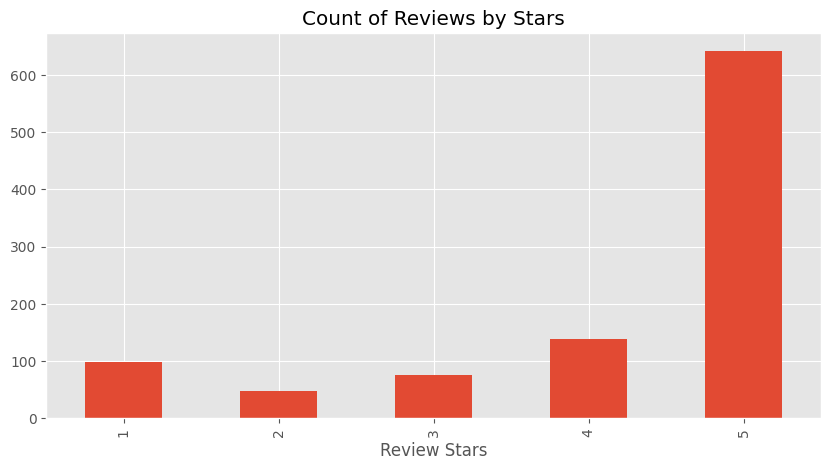

In [14]:
bar_plot = Score_value_count.plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
bar_plot.set_xlabel('Review Stars')
plt.show()

# NLTK 

In [15]:
sample_text = data['Text'][900]
sample_text

"My twin 10-month old babies treat this one as dessert.  Their first Earth's Best jar they loved was straight sweet potatoes.  After water, sweet potatoes are the first ingredient in this one, followed by apricot puree.  That's dessert for them right there.  After that comes the chicken and then brown rice flour (not as good as brown rice though).<br /><br />This is a meal that babies around the age of mine are probably almost all going to love instantly.  Almost all babies love sweet potatoes for starters.  Add apricot puree and there's really not much one could do to discourage babies after that.  I recommend this flavor brand.<br /><br />Ingredients per label: Water, organic sweet potatoes, organic apricot puree, mechanically separated organic chicken, organic brown rice flour.<br /><br />The rice flour absorbed the water and gave it a real nice consistency, and the sweet potatoes gave it a nice color.<br /><br />Nutrition per label: 80 calories, 15% protein, 90% vitamin A, 2% vitam

In [16]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(sample_text)
tokens[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Starzomee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['My',
 'twin',
 '10-month',
 'old',
 'babies',
 'treat',
 'this',
 'one',
 'as',
 'dessert']

In [17]:
# part of speech 
nltk.download('averaged_perceptron_tagger')

pos_tokens = nltk.pos_tag(tokens)
pos_tokens[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Starzomee\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('My', 'PRP$'),
 ('twin', 'JJ'),
 ('10-month', 'JJ'),
 ('old', 'JJ'),
 ('babies', 'NNS'),
 ('treat', 'VBP'),
 ('this', 'DT'),
 ('one', 'CD'),
 ('as', 'IN'),
 ('dessert', 'NN')]

In [18]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

chunk_tokens = nltk.chunk.ne_chunk(pos_tokens)
chunk_tokens.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Starzomee\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Starzomee\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  My/PRP$
  twin/JJ
  10-month/JJ
  old/JJ
  babies/NNS
  treat/VBP
  this/DT
  one/CD
  as/IN
  dessert/NN
  ./.
  Their/PRP$
  first/JJ
  (PERSON Earth/NNP)
  's/POS
  Best/JJS
  jar/NN
  they/PRP
  loved/VBD
  was/VBD
  straight/JJ
  sweet/NN
  potatoes/NNS
  ./.
  After/IN
  water/NN
  ,/,
  sweet/NN
  potatoes/NNS
  are/VBP
  the/DT
  first/JJ
  ingredient/NN
  in/IN
  this/DT
  one/CD
  ,/,
  followed/VBN
  by/IN
  apricot/JJ
  puree/NN
  ./.
  That/DT
  's/VBZ
  dessert/NN
  for/IN
  them/PRP
  right/RB
  there/RB
  ./.
  After/IN
  that/DT
  comes/VBZ
  the/DT
  chicken/NN
  and/CC
  then/RB
  brown/VB
  rice/NN
  flour/NN
  (/(
  not/RB
  as/RB
  good/JJ
  as/IN
  brown/JJ
  rice/NN
  though/IN
  )/)
  ./.
  </JJ
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  This/DT
  is/VBZ
  a/DT
  meal/NN
  that/WDT
  babies/VBZ
  around/IN
  the/DT
  age/NN
  of/IN
  mine/NN
  are/VBP
  probably/RB
  almost/RB
  all/DT
  going/VBG
  to/TO
  love/VB
  instantly/RB
  ./.
  Alm

# VADER Sentiment Analysis

In [19]:
import nltk 
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

from tqdm.notebook import tqdm 

SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Starzomee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
SIA.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [21]:
SIA.polarity_scores("I hate you!")

{'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound': -0.6114}

In [22]:
SIA.polarity_scores(sample_text)

{'neg': 0.012, 'neu': 0.741, 'pos': 0.247, 'compound': 0.9946}

In [23]:
# run polrity_score on the whole dataset
res = {}
for i , row in tqdm(data.iterrows() , total = len(data)):
    text = row['Text']
    myid = row['Id']
    res[myid] = SIA.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
vanders = pd.DataFrame(res).T
vanders = vanders.reset_index().rename(columns = {'index': 'Id'})
vanders = vanders.merge(data , how = 'left')

In [25]:
vanders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

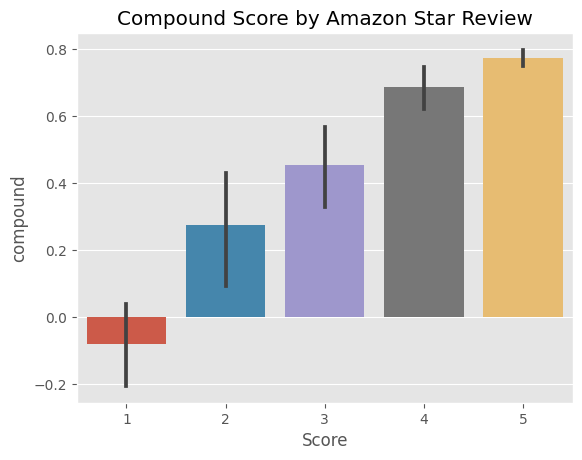

In [26]:
# ploting the vanders
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'vanders' is your DataFrame
# Make sure 'Score', 'pos', 'neu', and 'neg' columns exist in your DataFrame

# Plotting the data
vanders_plot = sns.barplot(data=vanders, x='Score', y='compound')

# Setting the title for the first plot
plt.title('Compound Score by Amazon Star Review')

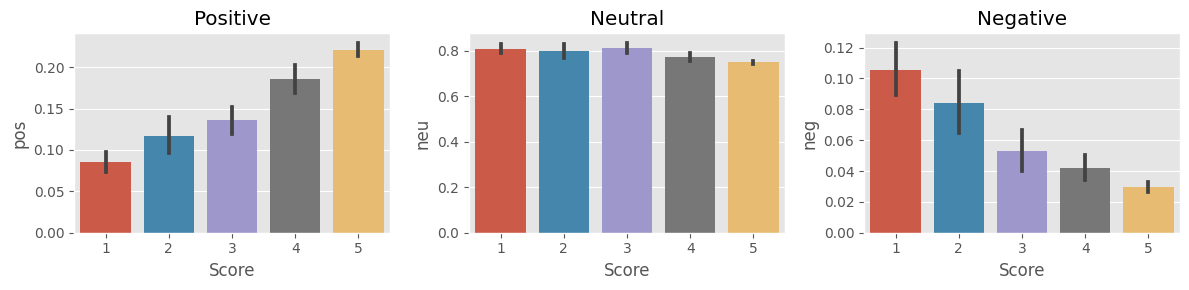

In [27]:


# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Creating separate bar plots for 'Positive', 'Neutral', and 'Negative'
sns.barplot(data=vanders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vanders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vanders, x='Score', y='neg', ax=axs[2])

# Setting titles for the subplots
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()


# Using pretrained model 
Roberta Pretrained Mode

In [28]:
from transformers import  AutoTokenizer , AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Starzomee\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [31]:
print(sample_text)

My twin 10-month old babies treat this one as dessert.  Their first Earth's Best jar they loved was straight sweet potatoes.  After water, sweet potatoes are the first ingredient in this one, followed by apricot puree.  That's dessert for them right there.  After that comes the chicken and then brown rice flour (not as good as brown rice though).<br /><br />This is a meal that babies around the age of mine are probably almost all going to love instantly.  Almost all babies love sweet potatoes for starters.  Add apricot puree and there's really not much one could do to discourage babies after that.  I recommend this flavor brand.<br /><br />Ingredients per label: Water, organic sweet potatoes, organic apricot puree, mechanically separated organic chicken, organic brown rice flour.<br /><br />The rice flour absorbed the water and gave it a real nice consistency, and the sweet potatoes gave it a nice color.<br /><br />Nutrition per label: 80 calories, 15% protein, 90% vitamin A, 2% vitami

In [32]:
SIA.polarity_scores(sample_text)

{'neg': 0.012, 'neu': 0.741, 'pos': 0.247, 'compound': 0.9946}

In [36]:
 # Run for roberta model
encoded_text = tokenizer(sample_text , return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
      'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores_dict






{'roberta_neg': 0.0094075715,
 'roberta_neu': 0.11948235,
 'roberta_pos': 0.8711101}

In [43]:
def polarity_scores_roberta(sample_text):
    encoded_text = tokenizer(sample_text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}

for i , row in tqdm(data.iterrows() , total = len(data)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = SIA.polarity_scores(text)
        vader_result_rename = {}
        for key , value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [46]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(data , how='left')

# Combine and compare

C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


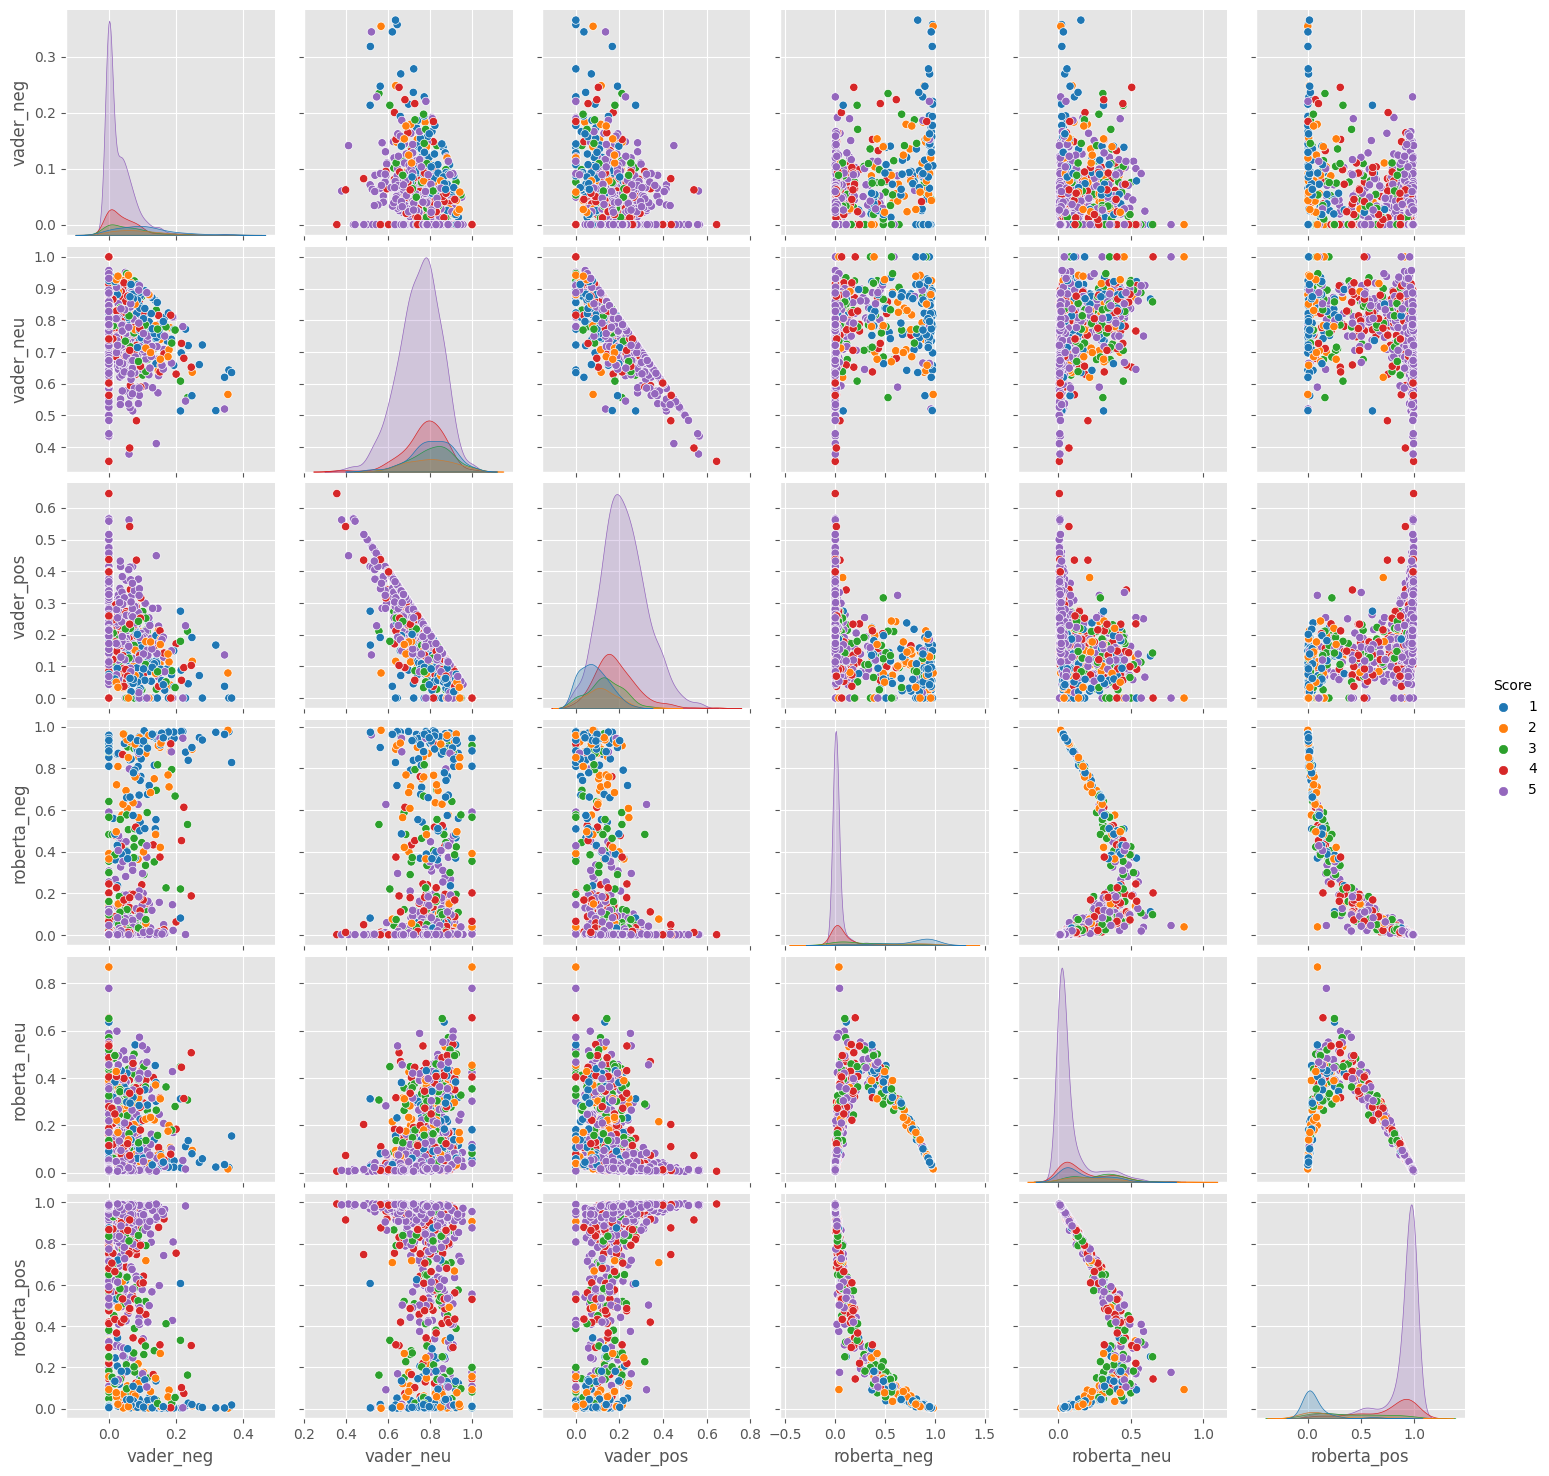

In [47]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Review Examples:

In [48]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [49]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [50]:
# nevative sentiment 5-Star view

In [51]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [52]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'